In [29]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

(168, 300, 3)


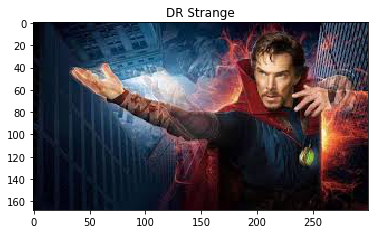

In [53]:
img=cv2.imread("G:/strange.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title("DR Strange")
print(img.shape)
plt.imshow(img)
plt.show()

In [68]:
all_pixels=img.reshape(-1,3)
print(all_pixels.shape)
dominant_colors=6
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

(50400, 3)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
centers=km.cluster_centers_

In [70]:
centers=np.array(centers,dtype='uint8')

In [71]:
centers

array([[ 95,  44,  44],
       [ 14,  13,  22],
       [ 68, 100, 129],
       [ 25,  43,  64],
       [198, 182, 177],
       [169, 108,  97]], dtype=uint8)

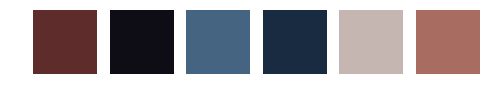

In [76]:
#_------------------------Dominant colors-------------
i=1
plt.figure(0,figsize=(8,2))
colors=[]
for each_col in centers:
    plt.subplot(1,6,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
    
plt.show()

In [77]:
new_img=np.zeros((50400,3),dtype='uint8')
new_img.shape

(50400, 3)

In [78]:
colors

[array([95, 44, 44], dtype=uint8),
 array([14, 13, 22], dtype=uint8),
 array([ 68, 100, 129], dtype=uint8),
 array([25, 43, 64], dtype=uint8),
 array([198, 182, 177], dtype=uint8),
 array([169, 108,  97], dtype=uint8)]

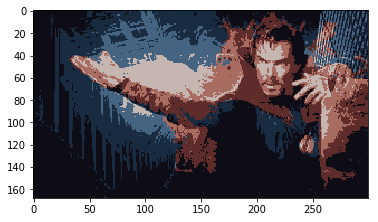

In [79]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[km.labels_[i]]
    
new_img=new_img.reshape((168,300,3))
plt.imshow(new_img)
plt.show()